# Charging Ahead: Analyzing Electric Vehicle Adoption and Infrastructure in the U.S. with a Focus on Washington State

# Importing Libraries

In [191]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Loading the data set



In [192]:
df=pd.read_csv(r'E:\Yogini\MS\SEM 1\Intro to DS\Assignment\Project\Alternative-Fueling-Stations-Clean.csv',
    low_memory=False)

# Basic Data Exploration 

**In this step, we will perform the below operations to check what the data set comprises of. We will check the below things:**

- **head of the dataset**
- **shape of the dataset**
- **info of the dataset**
- **summary of the dataset**

In [193]:
df.head()

,OBJECTID,access_code,access_days_time,access_detail_code,cards_accepted,date_last_confirmed,expected_date,fuel_type_code,groups_with_access_code,id,...,nps_unit_name,groups_with_access_code_fr,ev_charging_units,federal_agency_id,federal_agency_code,federal_agency_name,ev_network_ids_station,ev_network_ids_posts,x,y
0,1,private,NaN,NaN,NaN,2025-08-12T00:00:00Z,NaN,CNG,Private,17,...,NaN,Privé,NaN,NaN,NaN,NaN,NaN,NaN,-9.603201e+06,3.811703e+06
1,2,private,NaN,GOVERNMENT,NaN,2024-02-12T00:00:00Z,NaN,CNG,Private - Government only,45,...,NaN,Privé - Réservé au gouvernement,NaN,NaN,NaN,NaN,NaN,NaN,-9.391743e+06,4.004914e+06
2,3,public,24 hours daily,CREDIT_CARD_ALWAYS,CREDIT M V Voyager,2025-06-06T00:00:00Z,NaN,CNG,Public - Credit card at all times,73,...,NaN,Public - Carte de crédit en tout temps,NaN,NaN,NaN,NaN,NaN,NaN,-1.050581e+07,4.213214e+06
3,4,public,24 hours daily; call 866-809-4869 for Clean En...,CREDIT_CARD_ALWAYS,A CleanEnergy Comdata D FuelMan M V Voyager Wr...,2025-09-12T00:00:00Z,NaN,CNG,Public - Credit card at all times,81,...,NaN,Public - Carte de crédit en tout temps,NaN,NaN,NaN,NaN,NaN,NaN,-7.906639e+06,5.217275e+06
4,5,public,24 hours daily; call 866-809-4869 for Clean En...,CREDIT_CARD_ALWAYS,CleanEnergy D FleetOne FuelMan M V Voyager Wri...,2025-09-12T00:00:00Z,NaN,CNG,Public - Credit card at all times,84,...,NaN,Public - Carte de crédit en tout temps,NaN,NaN,NaN,NaN,NaN,NaN,-7.910847e+06,5.220057e+06


**head function will tell you the top records in the data set. By default python shows you only top 5 records.**

In [194]:
df.shape

(97014, 77)

In [195]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97014 entries, 0 to 97013
Data columns (total 77 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   OBJECTID                    97014 non-null  int64  
 1   access_code                 97014 non-null  object 
 2   access_days_time            86229 non-null  object 
 3   access_detail_code          9918 non-null   object 
 4   cards_accepted              17640 non-null  object 
 5   date_last_confirmed         95525 non-null  object 
 6   expected_date               2264 non-null   object 
 7   fuel_type_code              97014 non-null  object 
 8   groups_with_access_code     97014 non-null  object 
 9   id                          97014 non-null  int64  
 10  maximum_vehicle_class       25973 non-null  object 
 11  open_date                   96523 non-null  object 
 12  owner_type_code             34733 non-null  object 
 13  related_stations            970

In [196]:
print(df.columns)


Index(['OBJECTID', 'access_code', 'access_days_time', 'access_detail_code',
       'cards_accepted', 'date_last_confirmed', 'expected_date',
       'fuel_type_code', 'groups_with_access_code', 'id',
       'maximum_vehicle_class', 'open_date', 'owner_type_code',
       'related_stations', 'restricted_access', 'status_code',
       'funding_sources', 'facility_type', 'station_name', 'station_phone',
       'updated_at', 'geocode_status', 'latitude', 'longitude', 'city',
       'country', 'intersection_directions', 'plus4', 'state',
       'street_address', 'zip', 'bd_blends', 'cng_dispenser_num',
       'cng_fill_type_code', 'cng_has_rng', 'cng_psi', 'cng_renewable_source',
       'cng_total_compression', 'cng_total_storage', 'cng_vehicle_class',
       'e85_blender_pump', 'e85_other_ethanol_blends', 'ev_connector_types',
       'ev_dc_fast_num', 'ev_level1_evse_num', 'ev_level2_evse_num',
       'ev_network', 'ev_network_web', 'ev_other_evse', 'ev_pricing',
       'ev_renewable_source'

In [197]:
numeric_cols = df.select_dtypes(include=['number']).columns.tolist()
print(numeric_cols)

['OBJECTID', 'id', 'restricted_access', 'latitude', 'longitude', 'plus4', 'zip', 'cng_dispenser_num', 'cng_has_rng', 'cng_total_compression', 'cng_total_storage', 'e85_blender_pump', 'ev_dc_fast_num', 'ev_level1_evse_num', 'ev_level2_evse_num', 'ev_workplace_charging', 'hy_is_retail', 'lng_has_rng', 'lpg_primary', 'rd_max_biodiesel_level', 'federal_agency_id', 'x', 'y']


# Check for Duplicate records

In [198]:
# Check for duplicate data
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

df[dups]

Number of duplicate rows = 0


,OBJECTID,access_code,access_days_time,access_detail_code,cards_accepted,date_last_confirmed,expected_date,fuel_type_code,groups_with_access_code,id,...,nps_unit_name,groups_with_access_code_fr,ev_charging_units,federal_agency_id,federal_agency_code,federal_agency_name,ev_network_ids_station,ev_network_ids_posts,x,y


<Axes: >

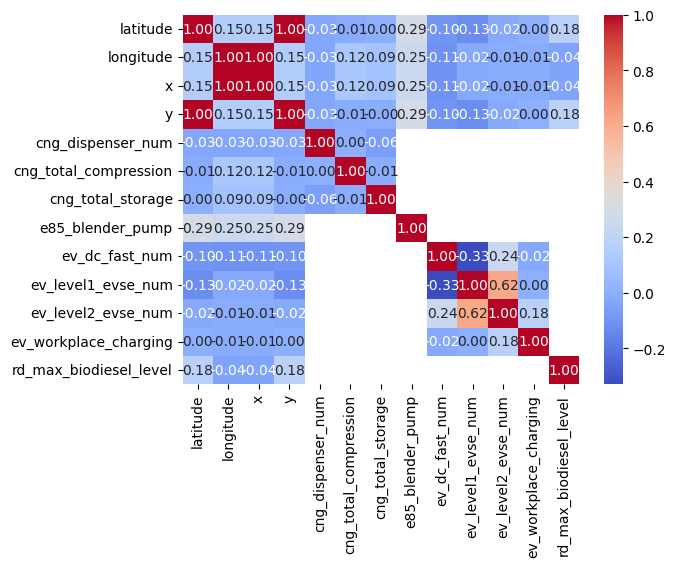

In [199]:
   
cols = [
 'latitude', 'longitude', 'x', 'y',
 'cng_dispenser_num', 'cng_total_compression', 'cng_total_storage',
 'e85_blender_pump',
 'ev_dc_fast_num', 'ev_level1_evse_num', 'ev_level2_evse_num',
 'ev_workplace_charging',
 'rd_max_biodiesel_level'
]
sns.heatmap(df[cols].corr(), annot=True, fmt='.2f', cmap='coolwarm') 
#corr = df[cols].corr()



In [200]:
ev_df = df[df["fuel_type_code"] == "ELEC"]
ev_df['total_ev_ports'] = (
    ev_df['ev_dc_fast_num'].fillna(0) +
    ev_df['ev_level1_evse_num'].fillna(0) +
    ev_df['ev_level2_evse_num'].fillna(0)
)
State_ev_df = ev_df.groupby('state')['total_ev_ports'].sum()
City_ev_df = ev_df.groupby('city')['total_ev_ports'].sum()
# Count stations by state and city
top_states = State_ev_df.sort_values(ascending=False)
top_cities = City_ev_df.sort_values(ascending=False).head()
print("Top 5 States and cities with EV Charging Stations:")
print(top_states)
print(top_cities)

Top 5 States and cities with EV Charging Stations:
state
CA    74792.0
NY    20532.0
FL    15119.0
TX    13523.0
MA    11012.0
WA     8854.0
GA     8379.0
CO     7568.0
VA     6735.0
NJ     6453.0
NC     6388.0
PA     6235.0
MD     6136.0
IL     5871.0
MI     5788.0
OH     5746.0
CT     5095.0
AZ     5022.0
OR     4550.0
TN     3468.0
MO     3379.0
UT     3104.0
MN     3074.0
NV     3007.0
IN     2453.0
WI     2291.0
SC     2262.0
AL     2196.0
OK     2011.0
ME     1634.0
KS     1555.0
VT     1433.0
DC     1390.0
IA     1310.0
NM     1287.0
KY     1271.0
HI     1223.0
AR     1180.0
RI     1045.0
LA     1014.0
NH      872.0
DE      867.0
MS      855.0
ID      746.0
NE      735.0
WV      625.0
MT      490.0
WY      352.0
SD      323.0
ND      283.0
AK      192.0
PR       85.0
Name: total_ev_ports, dtype: float64
city
Los Angeles    10069.0
San Diego       3397.0
Atlanta         2673.0
San Jose        2672.0
New York        2148.0
Name: total_ev_ports, dtype: float64


C:\Users\Hp\AppData\Local\Temp\ipykernel_25992\133159834.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ev_df['total_ev_ports'] = (


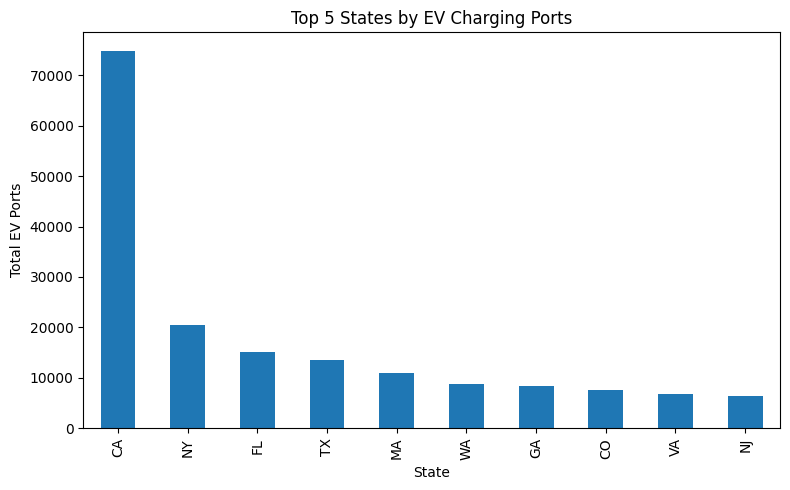

In [201]:
# Plot
plt.figure(figsize=(8,5))
top_states.head(10).plot(kind="bar")
plt.xlabel("State")
plt.ylabel("Total EV Ports")
plt.title("Top 5 States by EV Charging Ports")
plt.tight_layout()
plt.show()

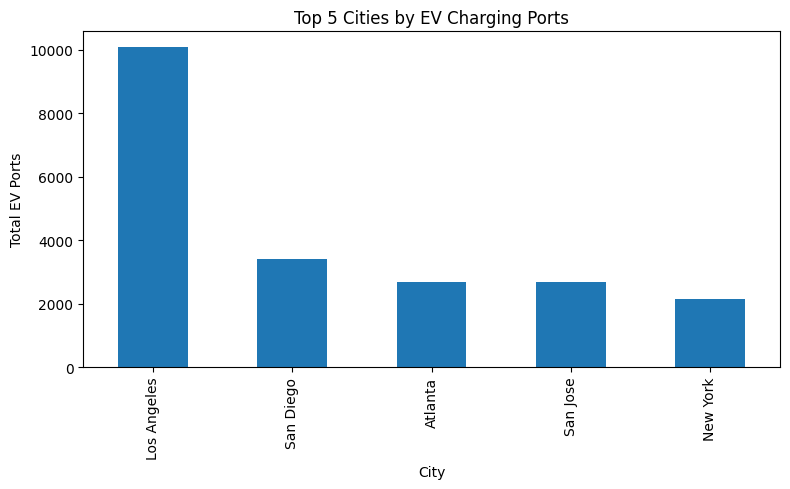

In [202]:
# Plot
plt.figure(figsize=(8,5))
top_cities.plot(kind="bar")
plt.xlabel("City")
plt.ylabel("Total EV Ports")
plt.title("Top 5 Cities by EV Charging Ports")
plt.tight_layout()
plt.show()

In [203]:
wa_ev_df = ev_df[ev_df['state'] == 'WA']

# Group by state (will return only WA)
State_ev_df = wa_ev_df.groupby('state')['total_ev_ports'].sum()

# Group by city within Washington
City_ev_df = wa_ev_df.groupby('city')['total_ev_ports'].sum()

print("Total EV Ports in Washington State:")
print(State_ev_df)

print("\nTop Cities in Washington by EV Ports:")
print(City_ev_df.sort_values(ascending=False).head(10))

Total EV Ports in Washington State:
state
WA    8854.0
Name: total_ev_ports, dtype: float64

Top Cities in Washington by EV Ports:
city
Seattle       1921.0
Bellevue       716.0
Tacoma         381.0
Spokane        321.0
Vancouver      316.0
Redmond        292.0
Kirkland       260.0
Bellingham     211.0
Pasco          193.0
Richland       186.0
Name: total_ev_ports, dtype: float64


In [204]:
df_wa_elec = df[(df['state'] == 'WA') & (df['fuel_type_code'] == 'ELEC')]
df_wa_elec['open_date'] = pd.to_datetime(df_wa_elec['open_date'])
df_wa_elec['year'] = df_wa_elec['open_date'].dt.year
ev_growth = df_wa_elec.groupby('year').size().reset_index(name='station_count')
print(ev_growth)


      year  station_count
0   2008.0              1
1   2010.0              7
2   2011.0             52
3   2012.0             22
4   2013.0             12
5   2014.0             37
6   2015.0             60
7   2016.0             62
8   2017.0             77
9   2018.0             91
10  2019.0            149
11  2020.0            157
12  2021.0            487
13  2022.0            290
14  2023.0            504
15  2024.0            449
16  2025.0            549


C:\Users\Hp\AppData\Local\Temp\ipykernel_25992\605415194.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_wa_elec['open_date'] = pd.to_datetime(df_wa_elec['open_date'])
C:\Users\Hp\AppData\Local\Temp\ipykernel_25992\605415194.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_wa_elec['year'] = df_wa_elec['open_date'].dt.year


In [205]:
df_wa_elec.head()

,OBJECTID,access_code,access_days_time,access_detail_code,cards_accepted,date_last_confirmed,expected_date,fuel_type_code,groups_with_access_code,id,...,groups_with_access_code_fr,ev_charging_units,federal_agency_id,federal_agency_code,federal_agency_name,ev_network_ids_station,ev_network_ids_posts,x,y,year
1968,1969,public,24 hours daily; pay lot; Drivers must bring th...,NaN,A Cash CREDIT D Debit M V,2025-06-06T00:00:00Z,NaN,ELEC,Public,33717,...,Public,"[{'network': 'Non-Networked', 'connectors': {'...",NaN,NaN,NaN,NaN,NaN,-1.361395e+07,6.014747e+06,2010.0
2406,2407,public,24 hours daily; Drivers must bring their own J...,NaN,NaN,2023-06-12T00:00:00Z,NaN,ELEC,Public,35620,...,Public,"[{'network': 'Non-Networked', 'connectors': {'...",NaN,NaN,NaN,NaN,NaN,-1.306768e+07,6.052682e+06,2010.0
2407,2408,public,24 hours daily,NaN,NaN,2023-04-06T00:00:00Z,NaN,ELEC,Public,35621,...,Public,"[{'network': 'Non-Networked', 'connectors': {'...",NaN,NaN,NaN,NaN,NaN,-1.307154e+07,6.049781e+06,2010.0
2657,2658,public,24 hours daily,NaN,NaN,2025-12-02T00:00:00Z,NaN,ELEC,Public,37181,...,Public,"[{'network': 'ChargePoint Network', 'connector...",NaN,NaN,NaN,"[""""USCPIL479461""""]","[""653191"",""653201""]",-1.360248e+07,6.043000e+06,2010.0
2704,2705,public,24 hours daily,NaN,NaN,2025-12-02T00:00:00Z,NaN,ELEC,Public,38082,...,Public,"[{'network': 'ChargePoint Network', 'connector...",NaN,NaN,NaN,"[""""USCPIL5420341""""]","[""9021991"",""9022001""]",-1.358315e+07,6.031544e+06,2008.0


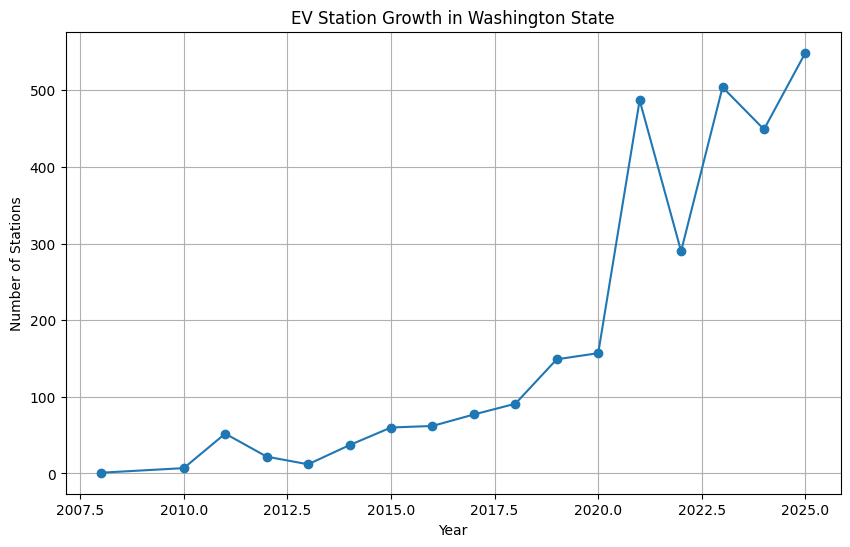

In [206]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(ev_growth['year'], ev_growth['station_count'], marker='o')
plt.title('EV Station Growth in Washington State')
plt.xlabel('Year')
plt.ylabel('Number of Stations')
plt.grid(True)
plt.show()


In [207]:
df[(df['state'] == 'WA') & (df['fuel_type_code'] == 'ELEC')].shape


(3023, 77)

In [208]:
print(df_wa_elec[df_wa_elec['ev_dc_fast_num'].notnull()][['city', 'ev_dc_fast_num']])


               city  ev_dc_fast_num
2879     Bellingham             1.0
2881         Burien             1.0
2883        Olympia             1.0
2885   Port Angeles             1.0
2886       Puyallup             1.0
...             ...             ...
96659        Tacoma             2.0
96660       Spokane             2.0
96708       Kenmore             6.0
96713      Lynnwood             4.0
96918      Lakewood             4.0

[470 rows x 2 columns]


In [209]:
#calculating total of EV Charging Ports
df_wa_elec['total_ev_ports'] = (
    df_wa_elec['ev_dc_fast_num'].fillna(0) +
    df_wa_elec['ev_level1_evse_num'].fillna(0) +
    df_wa_elec['ev_level2_evse_num'].fillna(0)
)





C:\Users\Hp\AppData\Local\Temp\ipykernel_25992\3143592398.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_wa_elec['total_ev_ports'] = (


In [210]:
print(df_wa_elec[['city', 'total_ev_ports']])


                 city  total_ev_ports
1968          Seattle            68.0
2406          Spokane             3.0
2407          Spokane             6.0
2657         Bellevue             2.0
2704         Issaquah             2.0
...               ...             ...
96847         Pullman             6.0
96848         Spokane             2.0
96915     Leavenworth             6.0
96918        Lakewood             4.0
96967  Spokane Valley             2.0

[3023 rows x 2 columns]


In [211]:


#group by city and sum total ports
city_ports_wa_elec = df_wa_elec.groupby('city')['total_ev_ports'].sum()




In [212]:

#getting top 10 cities
top10_wa_elec = city_ports_wa_elec.sort_values(ascending=False).head(10)

print(top10_wa_elec)




city
Seattle       1921.0
Bellevue       716.0
Tacoma         381.0
Spokane        321.0
Vancouver      316.0
Redmond        292.0
Kirkland       260.0
Bellingham     211.0
Pasco          193.0
Richland       186.0
Name: total_ev_ports, dtype: float64


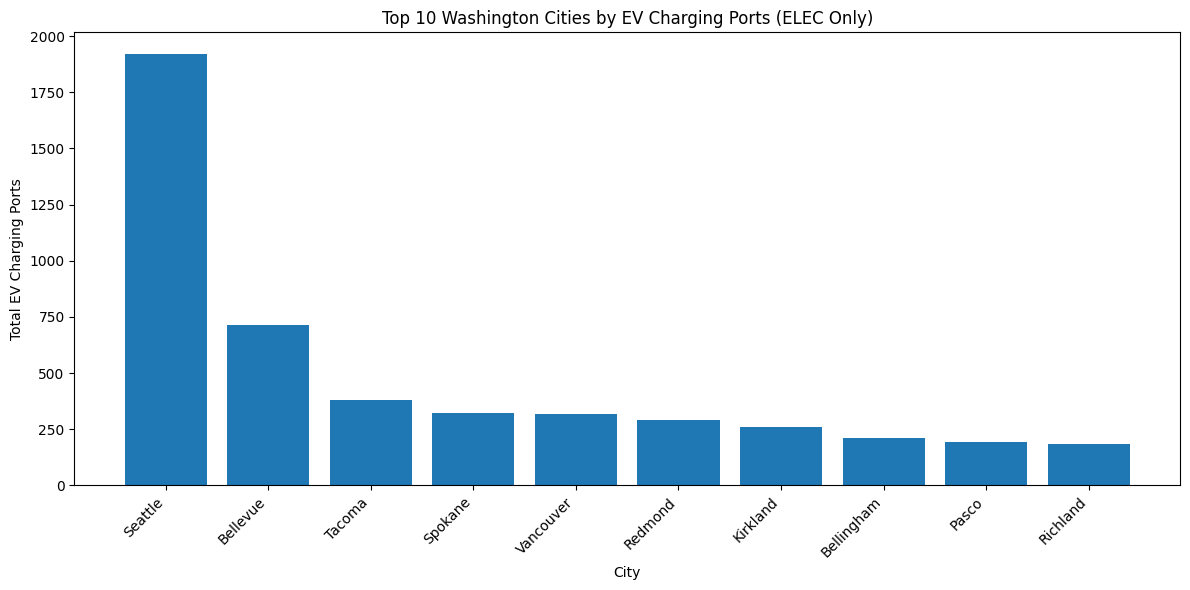

In [213]:
#plotting graph
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.bar(top10_wa_elec.index, top10_wa_elec.values)
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Washington Cities by EV Charging Ports (ELEC Only)')
plt.xlabel('City')
plt.ylabel('Total EV Charging Ports')
plt.tight_layout()
plt.show()


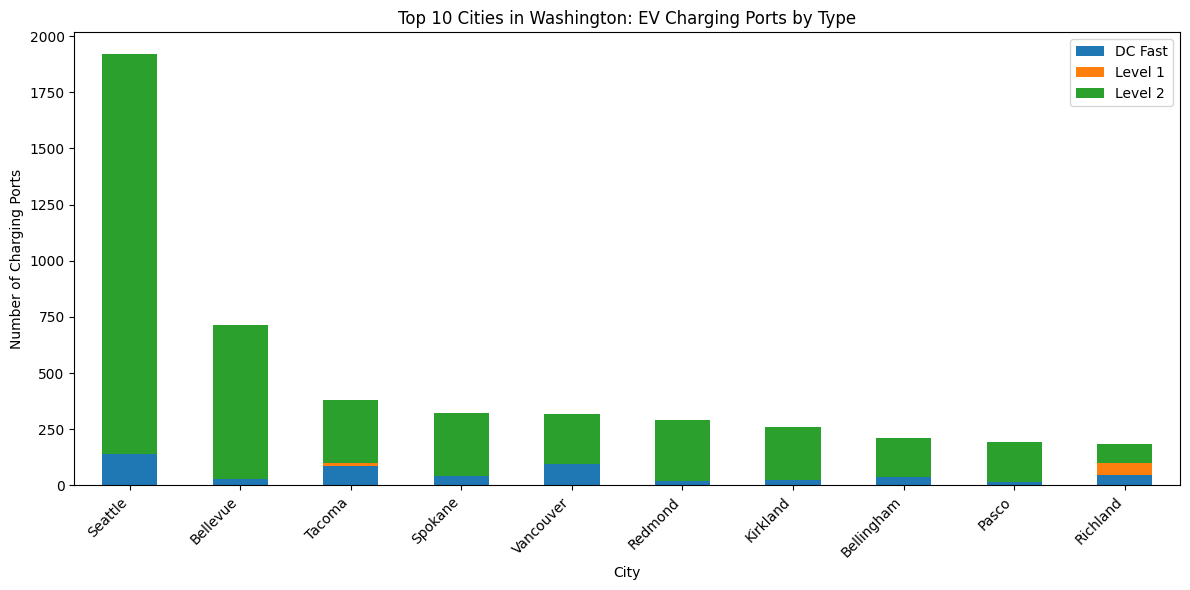

In [214]:
# Sum chargers for each city
city_chargers = df_wa_elec.groupby('city')[['ev_dc_fast_num','ev_level1_evse_num','ev_level2_evse_num']].sum()

city_chargers['total_ports'] = city_chargers.sum(axis=1)
top10_cities = city_chargers.sort_values(by='total_ports', ascending=False).head(10)
top10_cities = top10_cities.drop(columns='total_ports')  # drop total_ports for plotting

city_chargers['total_ports'] = city_chargers.sum(axis=1)
top10_cities = city_chargers.sort_values(by='total_ports', ascending=False).head(10)
top10_cities = top10_cities.drop(columns='total_ports')  # drop total_ports for plotting


import matplotlib.pyplot as plt

top10_cities.plot(kind='bar', stacked=True, figsize=(12,6), color=['#1f77b4','#ff7f0e','#2ca02c'])
plt.title('Top 10 Cities in Washington: EV Charging Ports by Type')
plt.xlabel('City')
plt.ylabel('Number of Charging Ports')
plt.xticks(rotation=45, ha='right')
plt.legend(['DC Fast', 'Level 1', 'Level 2'])
plt.tight_layout()
plt.show()


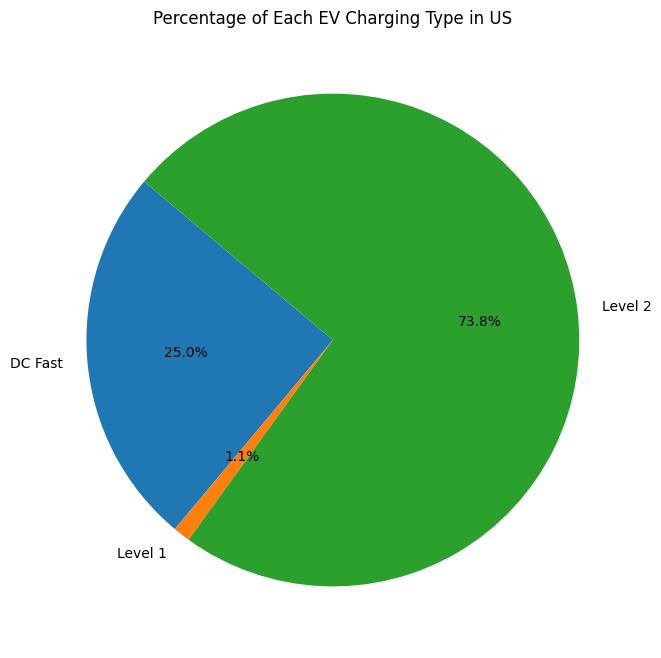

In [215]:
# Sum all chargers in Washington dataset
total_chargers = df[['ev_dc_fast_num','ev_level1_evse_num','ev_level2_evse_num']].sum()

# Plot pie chart
plt.figure(figsize=(8,8))
plt.pie(total_chargers, labels=['DC Fast', 'Level 1', 'Level 2'],
        autopct='%1.1f%%', startangle=140, colors=['#1f77b4','#ff7f0e','#2ca02c'])
plt.title('Percentage of Each EV Charging Type in US')
plt.show()


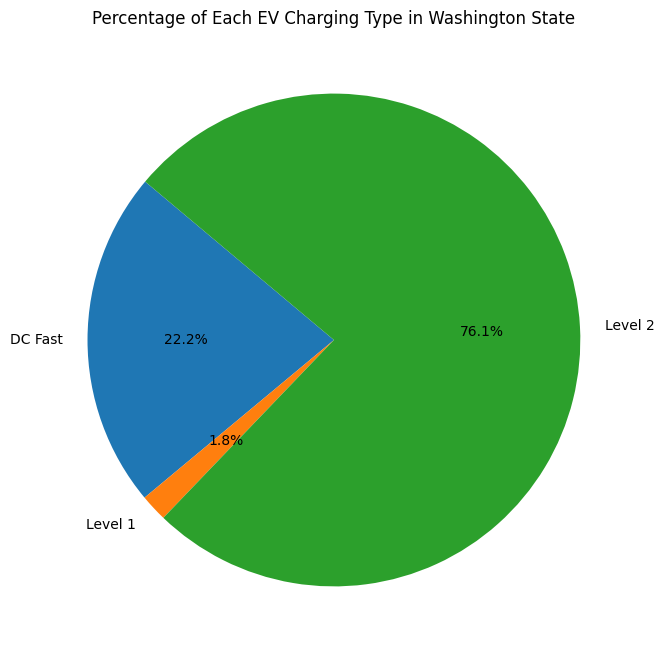

In [216]:
import matplotlib.pyplot as plt

# Sum all chargers in Washington dataset
total_chargers = df_wa_elec[['ev_dc_fast_num','ev_level1_evse_num','ev_level2_evse_num']].sum()

# Plot pie chart
plt.figure(figsize=(8,8))
plt.pie(total_chargers, labels=['DC Fast', 'Level 1', 'Level 2'],
        autopct='%1.1f%%', startangle=140, colors=['#1f77b4','#ff7f0e','#2ca02c'])
plt.title('Percentage of Each EV Charging Type in Washington State')
plt.show()


In [217]:
print(top10_wa_elec)


city
Seattle       1921.0
Bellevue       716.0
Tacoma         381.0
Spokane        321.0
Vancouver      316.0
Redmond        292.0
Kirkland       260.0
Bellingham     211.0
Pasco          193.0
Richland       186.0
Name: total_ev_ports, dtype: float64


In [218]:
import ast
import pandas as pd

def safe_convert(x):
    if isinstance(x, str):
        try:
            # Convert string to list
            return ast.literal_eval(x)
        except:
            return []  # fallback for malformed strings
    elif isinstance(x, list):
        return x  # already a list
    else:
        return []  # NaN or other types

df_wa_elec['ev_connector_types'] = df_wa_elec['ev_connector_types'].apply(safe_convert)


C:\Users\Hp\AppData\Local\Temp\ipykernel_25992\4131537746.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_wa_elec['ev_connector_types'] = df_wa_elec['ev_connector_types'].apply(safe_convert)


In [219]:
from collections import Counter

all_connectors = [conn for sublist in df_wa_elec['ev_connector_types'] for conn in sublist]


In [220]:
top5_connectors = Counter(all_connectors).most_common(5)
print(top5_connectors)


[('J1772COMBO', 281), ('CHADEMO', 230), ('J1772', 172), ('TESLA', 100), ('NEMA515', 11)]


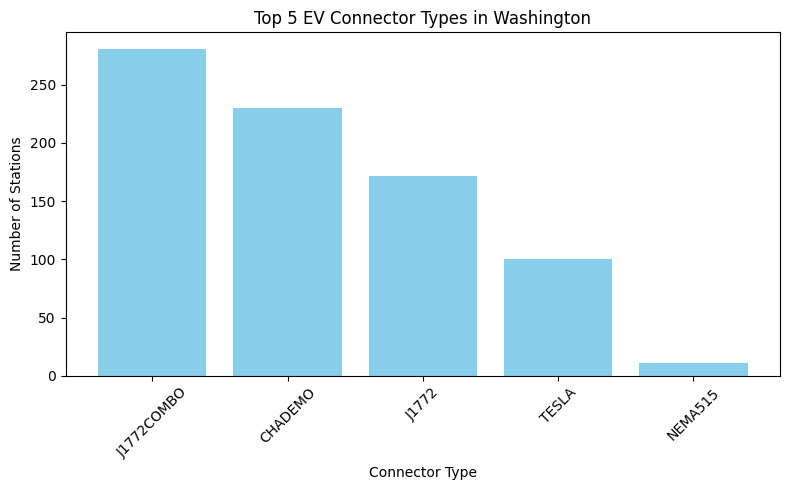

In [221]:
top5_df = pd.DataFrame(top5_connectors, columns=['Connector', 'Count'])

# 6️⃣ Plot bar chart
plt.figure(figsize=(8,5))
plt.bar(top5_df['Connector'], top5_df['Count'], color='skyblue')
plt.title('Top 5 EV Connector Types in Washington')
plt.xlabel('Connector Type')
plt.ylabel('Number of Stations')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**info() is used to check the Information about the data and the datatypes of each respective attributes.**

In [222]:
df.describe()

,OBJECTID,id,restricted_access,latitude,longitude,plus4,zip,cng_dispenser_num,cng_has_rng,cng_total_compression,...,ev_level1_evse_num,ev_level2_evse_num,ev_workplace_charging,hy_is_retail,lng_has_rng,lpg_primary,rd_max_biodiesel_level,federal_agency_id,x,y
count,97014.000000,97014.000000,83758.000000,97014.000000,97014.000000,0.0,97010.000000,1162.000000,1060.000000,571.000000,...,691.000000,72099.000000,85691.000000,75.00000,55.000000,2628.000000,970.000000,2323.000000,9.701400e+04,9.701400e+04
mean,48507.500000,243222.322283,0.021765,37.888574,-96.187846,NaN,56314.384600,5.165232,0.670755,928.735552,...,4.422576,2.783922,0.039001,0.92000,0.709091,0.347793,13.528866,13.802841,-1.070758e+07,4.587591e+06
std,28005.673845,115801.121954,0.145916,5.014207,19.034937,NaN,33345.036709,88.175849,0.470161,1036.098862,...,8.585175,4.853110,0.193597,0.27312,0.458368,0.476361,8.400925,8.085400,2.118960e+06,7.074116e+05
min,1.000000,17.000000,0.000000,17.992343,-162.286348,NaN,0.000000,-8.000000,0.000000,2.000000,...,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,5.000000,2.000000,-1.806563e+07,2.036652e+06
25%,24254.250000,164835.250000,0.000000,34.047766,-117.812008,NaN,27407.250000,1.000000,0.000000,250.000000,...,1.000000,2.000000,0.000000,1.00000,0.000000,0.000000,5.000000,8.000000,-1.311477e+07,4.035218e+06
50%,48507.500000,227201.500000,0.000000,38.554520,-91.478106,NaN,60010.000000,1.000000,1.000000,700.000000,...,2.000000,2.000000,0.000000,1.00000,1.000000,0.000000,20.000000,14.000000,-1.018330e+07,4.658060e+06
75%,72760.750000,350328.750000,0.000000,41.645121,-79.732757,NaN,91362.000000,2.000000,1.000000,1200.000000,...,4.000000,2.000000,0.000000,1.00000,1.000000,1.000000,20.000000,17.000000,-8.875810e+06,5.107968e+06
max,97014.000000,446697.000000,1.000000,64.855670,-65.650842,NaN,99926.000000,3000.000000,1.000000,8250.000000,...,90.000000,379.000000,1.000000,1.00000,1.000000,1.000000,99.000000,65.000000,-7.308218e+06,9.570457e+06


In [225]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97014 entries, 0 to 97013
Data columns (total 77 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   OBJECTID                    97014 non-null  int64  
 1   access_code                 97014 non-null  object 
 2   access_days_time            86229 non-null  object 
 3   access_detail_code          9918 non-null   object 
 4   cards_accepted              17640 non-null  object 
 5   date_last_confirmed         95525 non-null  object 
 6   expected_date               2264 non-null   object 
 7   fuel_type_code              97014 non-null  object 
 8   groups_with_access_code     97014 non-null  object 
 9   id                          97014 non-null  int64  
 10  maximum_vehicle_class       25973 non-null  object 
 11  open_date                   96523 non-null  object 
 12  owner_type_code             34733 non-null  object 
 13  related_stations            970

In [226]:
df_EV=pd.read_csv(r'C:\Users\Hp\Downloads\Electric-Vehicle-Population-Data_YD.csv')

In [227]:
df_EV.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,WA1E2AFY8R,Thurston,Olympia,WA,98512.0,2024,AUDI,Q5 E,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,23,0,22.0,263239938,POINT (-122.90787 46.9461),PUGET SOUND ENERGY INC,5.306701e+10
1,WAUUPBFF4J,Yakima,Wapato,WA,98951.0,2018,AUDI,A3,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,16,0,15.0,318160860,POINT (-120.42083 46.44779),PACIFICORP,5.307794e+10
2,1N4AZ0CP0F,King,Seattle,WA,98125.0,2015,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84,0,46.0,184963586,POINT (-122.30253 47.72656),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
3,WA1VAAGE5K,King,Kent,WA,98031.0,2019,AUDI,E-TRON,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,204,0,11.0,259426821,POINT (-122.17743 47.41185),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
4,7SAXCAE57N,Snohomish,Bothell,WA,98021.0,2022,TESLA,MODEL X,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,1.0,208182236,POINT (-122.18384 47.8031),PUGET SOUND ENERGY INC,5.306105e+10


In [228]:
print(df_wa_elec['zip'].dtype, " nulls:", df_wa_elec['zip'].isna().sum())

float64  nulls: 0


In [229]:
print(df_EV['Postal Code'].dtype, " nulls:", df_EV['Postal Code'].isna().sum())



float64  nulls: 9


In [230]:
def clean_zip(z):
    if pd.isna(z):
        return np.nan
    # if float (e.g. 98101.0), convert to int first if it's effectively integer
    if isinstance(z, float) and z.is_integer():
        z = int(z)
    # convert to string, strip, keep first 5 digits (handle 9-digit zips)
    s = str(z).strip()
    # remove decimal if any (e.g. '98101.0')
    s = s.split('.')[0]
    # if zip has leading zeros lost, ensure length 5 by zfill
    s = s.zfill(5) if s.isdigit() else s
    # if after cleaning it's non-digit, return as-is (we'll drop/inspect later)
    return s

In [231]:
df_wa_elec['zip5'] = df_wa_elec['zip'].apply(clean_zip)
df_EV['zip5'] = df_EV['Postal Code'].apply(clean_zip)

C:\Users\Hp\AppData\Local\Temp\ipykernel_25992\1306392489.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_wa_elec['zip5'] = df_wa_elec['zip'].apply(clean_zip)


In [232]:
print("\nStations zip5 value counts (top 10):")
print(df_wa_elec['zip5'].value_counts(dropna=False).head(10))


Stations zip5 value counts (top 10):
zip5
98004    196
98121    178
98109    154
98052    105
98101     76
98005     69
99354     55
98225     50
98188     37
98104     36
Name: count, dtype: int64


In [233]:
print("\nAdoption zip5 value counts (top 10):")
print(df_EV['zip5'].value_counts(dropna=False).head(10))


Adoption zip5 value counts (top 10):
zip5
98052    6384
98012    5049
98033    4302
98006    4035
98004    3839
98115    3811
98074    3488
98072    3304
98034    3263
98040    3089
Name: count, dtype: int64


In [234]:
print("\nStations missing zip5:", df_wa_elec['zip5'].isna().sum())
print("Adoption missing zip5:", df_EV['zip5'].isna().sum())


Stations missing zip5: 0
Adoption missing zip5: 9


In [235]:
df_EV.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract', 'zip5'],
      dtype='object')

In [236]:
import pandas as pd
import numpy as np

# ---------- 1. Clean numeric EVSE columns ----------
# Some EVSE columns are floats but have NaN, so replace NaN with 0
for col in ['ev_level1_evse_num','ev_level2_evse_num','ev_dc_fast_num']:
    df_wa_elec.loc[:, col] = pd.to_numeric(df_wa_elec[col], errors='coerce').fillna(0)


# ---------- 2. Aggregate stations by zip ----------
infra_zip = df_wa_elec.groupby('zip5' ).agg(
    stations_count = ('id','count'),
    level1_ports   = ('ev_level1_evse_num','sum'),
    level2_ports   = ('ev_level2_evse_num','sum'),
    dcfast_ports   = ('ev_dc_fast_num','sum'),
).reset_index()

infra_zip['total_ports'] = infra_zip[['level1_ports','level2_ports','dcfast_ports']].sum(axis=1)
infra_zip.head()

# ---------- 3. Aggregate EV adoption by zip ----------
adopt_zip = df_EV.groupby('zip5').size().reset_index(name='total_evs')
adopt_zip.head()


# ---------- 4. Merge both datasets ----------
merged = pd.merge(infra_zip, adopt_zip, on='zip5', how='inner')

print("Merged shape:", merged.shape)
merged.head()


Merged shape: (329, 7)


,zip5,stations_count,level1_ports,level2_ports,dcfast_ports,total_ports,total_evs
0,10009,1,0.0,4.0,0.0,4.0,1
1,98001,13,0.0,23.0,16.0,39.0,1156
2,98002,9,0.0,8.0,22.0,30.0,472
3,98003,17,0.0,24.0,34.0,58.0,922
4,98004,196,0.0,469.0,24.0,493.0,3839


In [237]:
zip_city = df_wa_elec.groupby('zip5').agg(city=('city', 'first')).reset_index()
merged = pd.merge(merged, zip_city, on='zip5', how='left')
merged.head()


,zip5,stations_count,level1_ports,level2_ports,dcfast_ports,total_ports,total_evs,city
0,10009,1,0.0,4.0,0.0,4.0,1,Vancouver
1,98001,13,0.0,23.0,16.0,39.0,1156,Auburn
2,98002,9,0.0,8.0,22.0,30.0,472,Auburn
3,98003,17,0.0,24.0,34.0,58.0,922,Federal Way
4,98004,196,0.0,469.0,24.0,493.0,3839,Bellevue


In [238]:
stations_zip = df_wa_elec.groupby('zip5').size().reset_index(name='total_stations')
zip_compare = pd.merge(stations_zip, adopt_zip, on='zip5', how='outer').fillna(0)

zip_compare.sort_values(by='total_evs', ascending=False).head(10)


,zip5,total_stations,total_evs
538,98052,105.0,6384.0
508,98012,6.0,5049.0
523,98033,33.0,4302.0
503,98006,7.0,4035.0
501,98004,196.0,3839.0
566,98115,7.0,3811.0
549,98074,5.0,3488.0
548,98072,15.0,3304.0
524,98034,22.0,3263.0
530,98040,3.0,3089.0


In [239]:
import pandas as pd

cols = ['total_stations', 'total_evs']
zip_compare[cols] = zip_compare[cols].apply(pd.to_numeric, errors='coerce')
corr = zip_compare[['total_stations', 'total_evs']].corr(method='pearson')


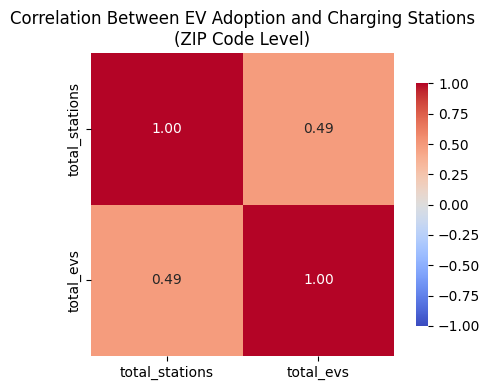

In [240]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(5,4))
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    vmin=-1,
    vmax=1,
    square=True,
    cbar_kws={"shrink": 0.8}
)

plt.title("Correlation Between EV Adoption and Charging Stations\n(ZIP Code Level)")
plt.tight_layout()
plt.show()


In [241]:
zip_compare[['total_stations', 'total_evs']].corr()


,total_stations,total_evs
total_stations,1.000000,0.491814
total_evs,0.491814,1.000000


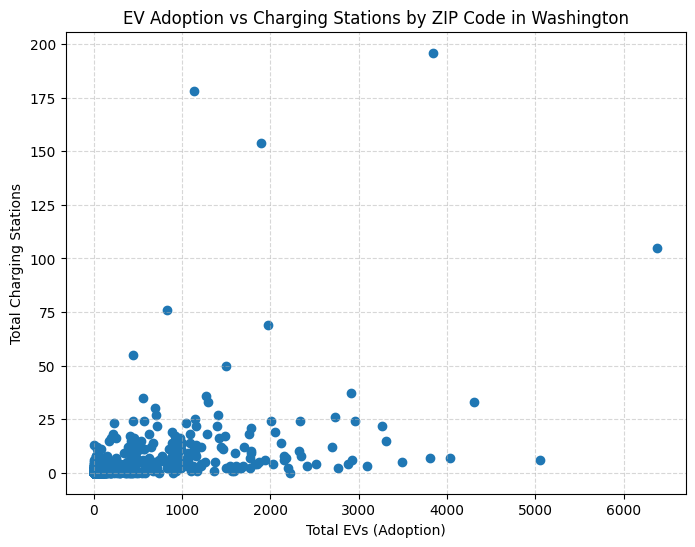

In [242]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(zip_compare['total_evs'], zip_compare['total_stations'])

plt.title('EV Adoption vs Charging Stations by ZIP Code in Washington')
plt.xlabel('Total EVs (Adoption)')
plt.ylabel('Total Charging Stations')
plt.grid(True, linestyle='--', alpha=0.5)

plt.show()


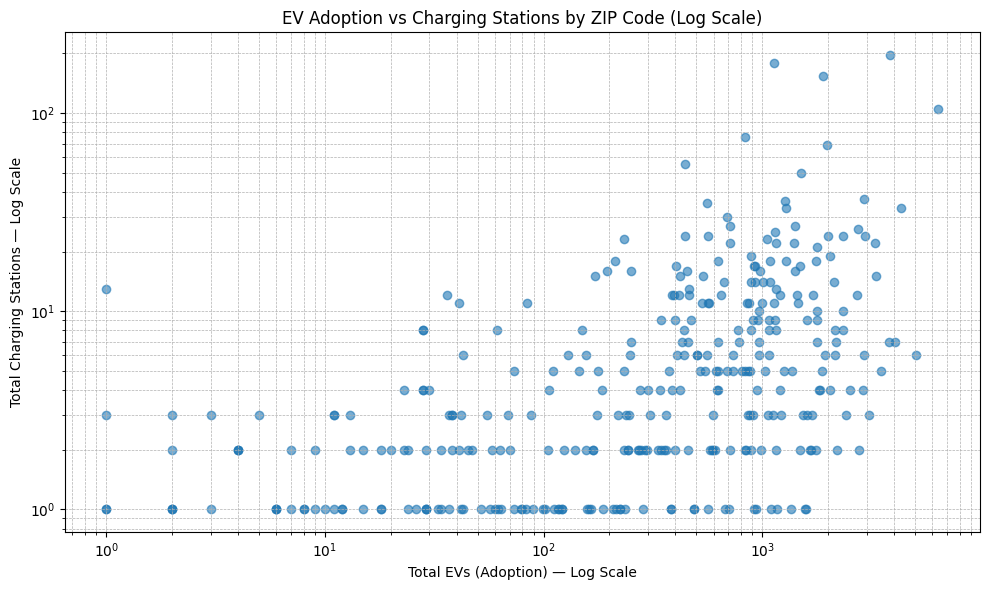

In [243]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))

plt.scatter(zip_compare['total_evs'], zip_compare['total_stations'], alpha=0.6)

plt.xscale('log')
plt.yscale('log')

plt.xlabel("Total EVs (Adoption) — Log Scale")
plt.ylabel("Total Charging Stations — Log Scale")
plt.title("EV Adoption vs Charging Stations by ZIP Code (Log Scale)")

plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.tight_layout()
plt.show()


In [244]:
merged['ev_per_port'] = merged['total_evs'] / merged['total_ports'].replace({0: np.nan})

# Sort by ratio (higher = worse access)
highEV_lowInfra_ratio = merged.sort_values('ev_per_port', ascending=False)

highEV_lowInfra_ratio.head()


,zip5,stations_count,level1_ports,level2_ports,dcfast_ports,total_ports,total_evs,city,ev_per_port
76,98177,1,0.0,1.0,0.0,1.0,1583,Shoreline,1583.0
65,98126,1,0.0,1.0,0.0,1.0,1168,Seattle,1168.0
77,98178,1,0.0,1.0,0.0,1.0,935,Seattle,935.0
70,98146,1,0.0,1.0,0.0,1.0,920,Seattle,920.0
20,98031,1,0.0,2.0,0.0,2.0,1561,Kent,780.5


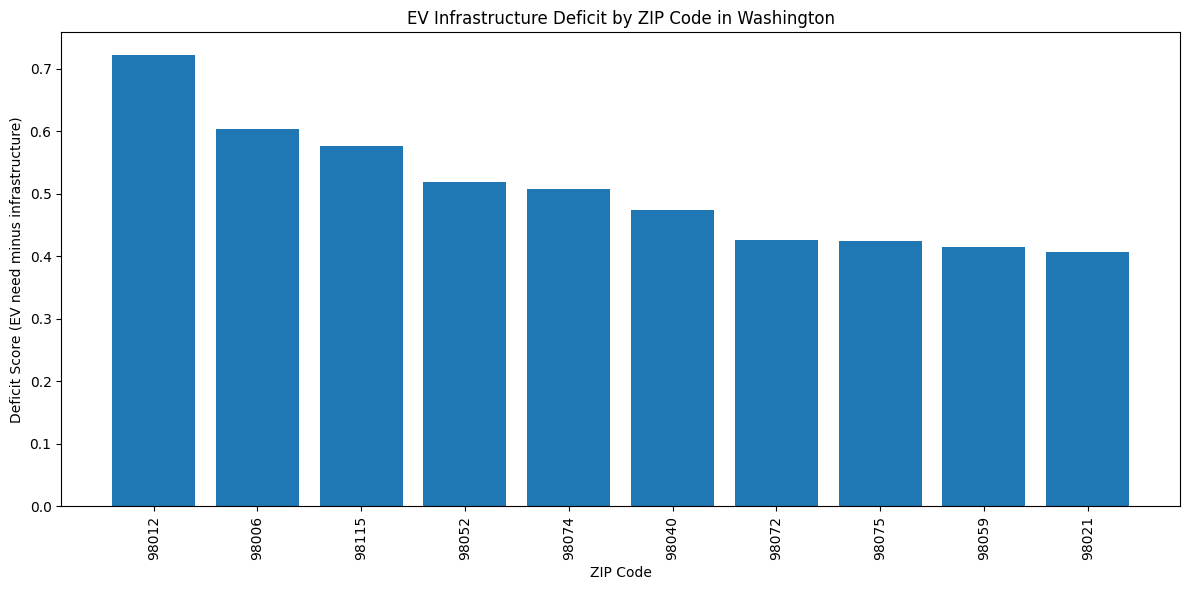

In [245]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

merged['ev_scaled'] = scaler.fit_transform(merged[['total_evs']])
merged['infra_scaled'] = scaler.fit_transform(merged[['total_ports']])

merged['deficit_score'] = merged['ev_scaled'] - merged['infra_scaled']

highEV_lowInfra = merged.sort_values('deficit_score', ascending=False)

top10_deficit=highEV_lowInfra.head(10)



plt.figure(figsize=(12,6))
plt.bar(top10_deficit['zip5'].astype(str), top10_deficit['deficit_score'])
plt.xticks(rotation=90)
plt.xlabel("ZIP Code")
plt.ylabel("Deficit Score (EV need minus infrastructure)")
plt.title("EV Infrastructure Deficit by ZIP Code in Washington")
plt.tight_layout()
plt.show()



In [246]:
highInfra_lowEV = merged.sort_values('deficit_score', ascending=True)

highInfra_lowEV.head()

,zip5,stations_count,level1_ports,level2_ports,dcfast_ports,total_ports,total_evs,city,ev_per_port,ev_scaled,infra_scaled,deficit_score
61,98121,178,0.0,353.0,6.0,359.0,1131,Seattle,3.150418,0.177033,0.727642,-0.550610
53,98109,154,0.0,357.0,2.0,359.0,1895,Seattle,5.278552,0.296726,0.727642,-0.430917
4,98004,196,0.0,469.0,24.0,493.0,3839,Bellevue,7.787018,0.601285,1.000000,-0.398715
45,98101,76,0.0,220.0,16.0,236.0,831,Seattle,3.521186,0.130033,0.477642,-0.347609
176,98409,24,10.0,92.0,47.0,149.0,441,Tacoma,2.959732,0.068933,0.300813,-0.231880


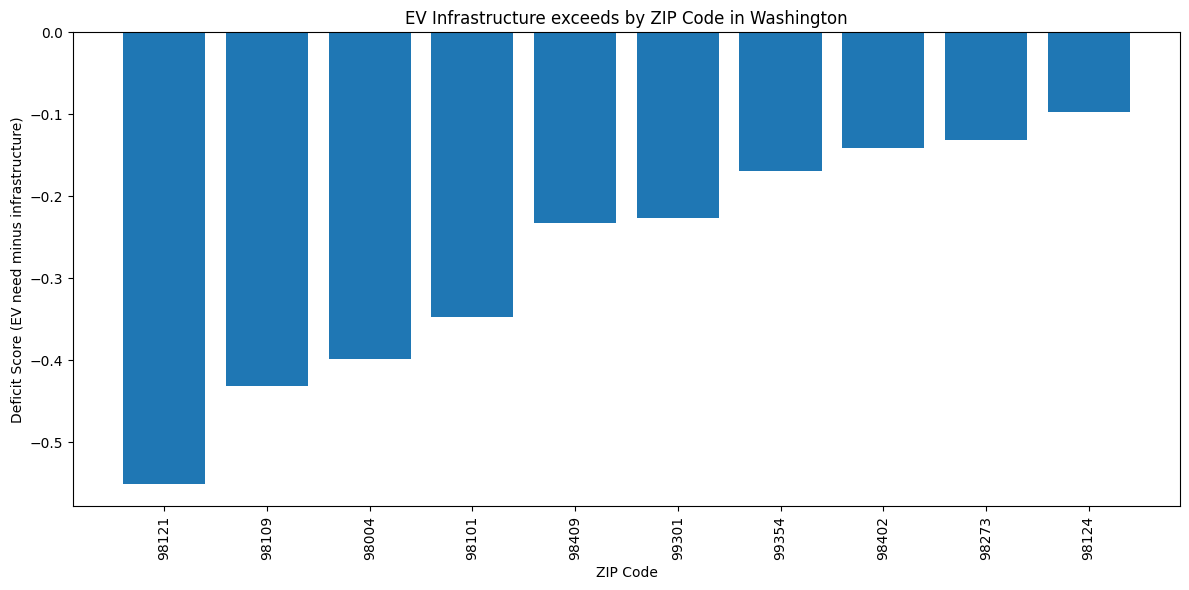

In [247]:
Top10_OverInfra= highInfra_lowEV.head(10)
plt.figure(figsize=(12,6))
plt.bar(Top10_OverInfra['zip5'].astype(str), Top10_OverInfra['deficit_score'])
plt.xticks(rotation=90)
plt.xlabel("ZIP Code")
plt.ylabel("Deficit Score (EV need minus infrastructure)")
plt.title("EV Infrastructure exceeds by ZIP Code in Washington")
plt.tight_layout()
plt.show()


In [248]:
#Group by city
city_summary = merged.groupby('city').agg(
    total_evs = ('total_evs', 'sum'),          # sum of EVs in the city
    total_stations = ('stations_count', 'sum'), # sum of charging stations
    total_ports = ('total_ports', 'sum')        # optional: sum of all ports
).reset_index()

#Sort by total EVs or stations (optional)
city_summary = city_summary.sort_values('total_evs', ascending=False)

#Display of top cities
print(city_summary.head(10))



          city  total_evs  total_stations  total_ports
158    Seattle      43787             727       1960.0
10    Bellevue      13422             294        708.0
192  Vancouver       9862              81        320.0
16     Bothell       9712              31        114.0
147    Redmond       8801             108        288.0
83    Kirkland       7565              55        260.0
156  Sammamish       6417              11         38.0
74    Issaquah       6290              41        108.0
182     Tacoma       5997              97        367.0
148     Renton       5767              45        128.0


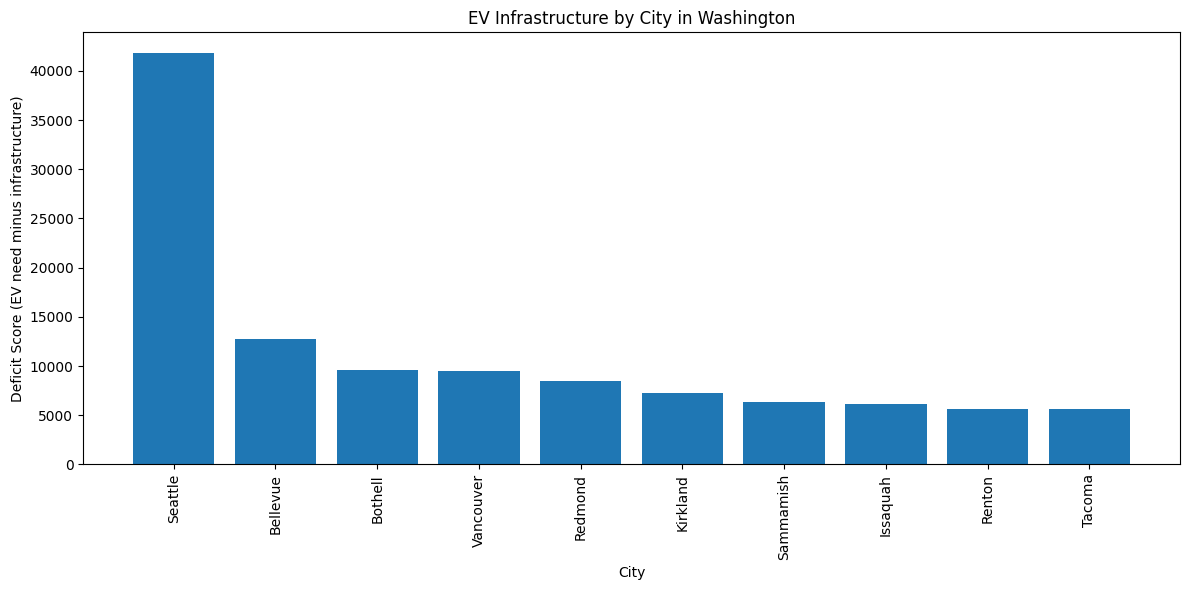

In [249]:
city_summary['deficit_score'] = city_summary['total_evs'] - city_summary['total_ports']
city_summary = city_summary.sort_values('deficit_score', ascending=False)

highEV = city_summary.sort_values('deficit_score', ascending=False)

top10EVt=highEV.head(10)



plt.figure(figsize=(12,6))
plt.bar(top10EVt['city'].astype(str), top10EVt['deficit_score'])
plt.xticks(rotation=90)
plt.xlabel("City")
plt.ylabel("Deficit Score (EV need minus infrastructure)")
plt.title("EV Infrastructure by City in Washington")
plt.tight_layout()
plt.show()

In [250]:
city_summary

,city,total_evs,total_stations,total_ports,deficit_score
158,Seattle,43787,727,1960.0,41827.0
10,Bellevue,13422,294,708.0,12714.0
16,Bothell,9712,31,114.0,9598.0
192,Vancouver,9862,81,320.0,9542.0
147,Redmond,8801,108,288.0,8513.0
...,...,...,...,...,...
99,Marblemount,2,3,4.0,-2.0
198,Washtucna,2,1,4.0,-2.0
73,Inchelium,2,2,4.0,-2.0
81,Keyport,15,2,24.0,-9.0


In [251]:
# Sort by deficit score
sorted_df = city_summary.sort_values('deficit_score', ascending=False)

# Top 3 high-deficit (EV > Infrastructure)
top3_positive = sorted_df.head(3)

# Bottom 3 low-deficit (Infrastructure > EV)
top3_negative = sorted_df.tail(3)

# Cities with deficit_score == 0
zero_deficit = city_summary[city_summary['deficit_score'] == 0]

print("Top 3 Positive Deficit Cities:\n", top3_positive)
print("\nTop 3 Negative Deficit Cities:\n", top3_negative)
print("\nCities with Zero Deficit:\n", zero_deficit)


Top 3 Positive Deficit Cities:
          city  total_evs  total_stations  total_ports  deficit_score
158   Seattle      43787             727       1960.0        41827.0
10   Bellevue      13422             294        708.0        12714.0
16    Bothell       9712              31        114.0         9598.0

Top 3 Negative Deficit Cities:
           city  total_evs  total_stations  total_ports  deficit_score
73   Inchelium          2               2          4.0           -2.0
81     Keyport         15               2         24.0           -9.0
174    Sprague          3               3         13.0          -10.0

Cities with Zero Deficit:
              city  total_evs  total_stations  total_ports  deficit_score
59  Fairchild AFB         30               4         30.0            0.0


In [252]:
#Regression test
import statsmodels.api as sm
# Independent variable (EV count)
X = city_summary["total_evs"]
X = sm.add_constant(X)  # Adds intercept term

# Dependent variable (Charging ports)
Y = city_summary["total_ports"]
model = sm.OLS(Y, X).fit()
print(model.summary())
city_summary["predicted_ports"] = model.predict(X)
city_summary["residuals"] = city_summary["total_ports"] - city_summary["predicted_ports"]


                            OLS Regression Results                            
Dep. Variable:            total_ports   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     1912.
Date:                Tue, 09 Dec 2025   Prob (F-statistic):          1.60e-106
Time:                        15:46:24   Log-Likelihood:                -1102.5
No. Observations:                 209   AIC:                             2209.
Df Residuals:                     207   BIC:                             2216.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -6.7443      3.470     -1.944      0.0

In [253]:
# Example: compare residuals to deficit_score
city_summary[["city", "total_evs", "total_ports", "predicted_ports", "residuals"]]


,city,total_evs,total_ports,predicted_ports,residuals
158,Seattle,43787,1960.0,1794.698756,165.301244
10,Bellevue,13422,708.0,545.450824,162.549176
16,Bothell,9712,114.0,392.817535,-278.817535
192,Vancouver,9862,320.0,398.988692,-78.988692
147,Redmond,8801,288.0,355.338040,-67.338040
...,...,...,...,...,...
99,Marblemount,2,4.0,-6.662044,10.662044
198,Washtucna,2,4.0,-6.662044,10.662044
73,Inchelium,2,4.0,-6.662044,10.662044
81,Keyport,15,24.0,-6.127210,30.127210


In [254]:
# Sort by deficit score
sorted_df = city_summary.sort_values('residuals', ascending=False)

# Top 3 high-residual (EV > Infrastructure)
top3_positive_residual = sorted_df.head(3)

# Bottom 3 low-residual (Infrastructure > EV)
top3_negative_residual = sorted_df.tail(3)

# Cities with residual == 0
zero_residual = city_summary[city_summary['deficit_score'] == 0]

print("Top 3 Positive Deficit Cities:\n", top3_positive_residual)
print("\nTop 3 Negative Deficit Cities:\n", top3_negative_residual)
print("\nCities with Zero Deficit:\n", zero_residual)

Top 3 Positive Deficit Cities:
          city  total_evs  total_stations  total_ports  deficit_score  \
158   Seattle      43787             727       1960.0        41827.0   
10   Bellevue      13422             294        708.0        12714.0   
133     Pasco       1047              23        193.0          854.0   

     predicted_ports   residuals  
158      1794.698756  165.301244  
10        545.450824  162.549176  
133        36.330352  156.669648  

Top 3 Negative Deficit Cities:
           city  total_evs  total_stations  total_ports  deficit_score  \
74    Issaquah       6290              41        108.0         6182.0   
156  Sammamish       6417              11         38.0         6379.0   
16     Bothell       9712              31        114.0         9598.0   

     predicted_ports   residuals  
74        252.032868 -144.032868  
156       257.257781 -219.257781  
16        392.817535 -278.817535  

Cities with Zero Deficit:
              city  total_evs  total_stations 

In [255]:
from scipy.stats import skew

print("Skewness of EVs:", skew(city_summary["total_evs"]))
print("Skewness of Ports:", skew(city_summary["total_ports"]))


Skewness of EVs: 9.162885931057899
Skewness of Ports: 10.30168714897271


In [256]:
# Log-transform EVs and ports (add 1 to avoid log(0))
X = np.log1p(city_summary["total_evs"])
Y = np.log1p(city_summary["total_ports"])

skew_evs = skew(X)
skew_ports = skew(Y)

print(f"Skewness of log-transformed EVs: {skew_evs:.3f}")
print(f"Skewness of log-transformed Ports: {skew_ports:.3f}")

Skewness of log-transformed EVs: -0.056
Skewness of log-transformed Ports: 0.733


In [257]:
import numpy as np
import statsmodels.api as sm



# Add constant for intercept
X = sm.add_constant(X)

# Fit regression
model = sm.OLS(Y, X).fit()
print(model.summary())

# Calculate residuals
city_summary["log_predicted_ports"] = np.expm1(model.predict(X))  # back to original scale
city_summary["log_residuals"] = city_summary["total_ports"] - city_summary["log_predicted_ports"]


                            OLS Regression Results                            
Dep. Variable:            total_ports   R-squared:                       0.515
Model:                            OLS   Adj. R-squared:                  0.513
Method:                 Least Squares   F-statistic:                     219.9
Date:                Tue, 09 Dec 2025   Prob (F-statistic):           2.26e-34
Time:                        15:46:25   Log-Likelihood:                -284.97
No. Observations:                 209   AIC:                             573.9
Df Residuals:                     207   BIC:                             580.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0503      0.187     -0.269      0.7

In [258]:
city_summary[["city", "total_evs", "total_ports", "log_predicted_ports", "log_residuals"]]

,city,total_evs,total_ports,log_predicted_ports,log_residuals
158,Seattle,43787,1960.0,165.201728,1794.798272
10,Bellevue,13422,708.0,92.871395,615.128605
16,Bothell,9712,114.0,79.288246,34.711754
192,Vancouver,9862,320.0,79.884940,240.115060
147,Redmond,8801,288.0,75.557279,212.442721
...,...,...,...,...,...
99,Marblemount,2,4.0,0.616848,3.383152
198,Washtucna,2,4.0,0.616848,3.383152
73,Inchelium,2,4.0,0.616848,3.383152
81,Keyport,15,24.0,2.630125,21.369875


In [259]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Assume your dataframe is named city_summary and has 'total_evs' and 'total_ports'

# 1. Log-transform EVs and ports (add 1 to avoid log(0))
city_summary['log_evs'] = np.log1p(city_summary['total_evs'])
city_summary['log_ports'] = np.log1p(city_summary['total_ports'])

# 2. Prepare independent variable (with constant for intercept)
X = sm.add_constant(city_summary['log_evs'])
Y = city_summary['log_ports']

# 3. Fit linear regression on log-log data
model = sm.OLS(Y, X).fit()
print(model.summary())

# 4. Predict log(ports) from model
city_summary['log_predicted_ports'] = model.predict(X)

# 5. Convert predictions back to original scale
city_summary['predicted_ports'] = np.expm1(city_summary['log_predicted_ports'])

# 6. Compute residuals in actual units
city_summary['residuals'] = city_summary['total_ports'] - city_summary['predicted_ports']

# 7. Optional: view top cities with largest positive/negative residuals
top_positive_residuals = city_summary.sort_values('residuals', ascending=False).head(10)
top_negative_residuals = city_summary.sort_values('residuals').head(10)

print(top_positive_residuals[['city','total_evs','total_ports','predicted_ports','residuals']])
print(top_negative_residuals[['city','total_evs','total_ports','predicted_ports','residuals']])


                            OLS Regression Results                            
Dep. Variable:              log_ports   R-squared:                       0.515
Model:                            OLS   Adj. R-squared:                  0.513
Method:                 Least Squares   F-statistic:                     219.9
Date:                Tue, 09 Dec 2025   Prob (F-statistic):           2.26e-34
Time:                        15:46:26   Log-Likelihood:                -284.97
No. Observations:                 209   AIC:                             573.9
Df Residuals:                     207   BIC:                             580.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0503      0.187     -0.269      0.7

In [260]:
# Example: compare residuals to deficit_score
city_summary[["city", "total_evs", "total_ports", "predicted_ports", "residuals"]]


,city,total_evs,total_ports,predicted_ports,residuals
158,Seattle,43787,1960.0,165.201728,1794.798272
10,Bellevue,13422,708.0,92.871395,615.128605
16,Bothell,9712,114.0,79.288246,34.711754
192,Vancouver,9862,320.0,79.884940,240.115060
147,Redmond,8801,288.0,75.557279,212.442721
...,...,...,...,...,...
99,Marblemount,2,4.0,0.616848,3.383152
198,Washtucna,2,4.0,0.616848,3.383152
73,Inchelium,2,4.0,0.616848,3.383152
81,Keyport,15,24.0,2.630125,21.369875


In [261]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Fit Poisson regression (using raw counts)
# total_ports ~ total_evs (can try log-transform on predictor if needed)
poisson_model = smf.glm(formula='total_ports ~ total_evs', 
                        data=city_summary, 
                        family=sm.families.Poisson()).fit()

print(poisson_model.summary())

# Predict ports using Poisson model
city_summary['predicted_ports_poisson'] = poisson_model.predict(city_summary)
city_summary['residuals_poisson'] = city_summary['total_ports'] - city_summary['predicted_ports_poisson']

# View top residuals
print(city_summary[['city','total_evs','total_ports','predicted_ports_poisson','residuals_poisson']].head(10))


                 Generalized Linear Model Regression Results                  
Dep. Variable:            total_ports   No. Observations:                  209
Model:                            GLM   Df Residuals:                      207
Model Family:                 Poisson   Df Model:                            1
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -5663.8
Date:                Tue, 09 Dec 2025   Deviance:                       10443.
Time:                        15:46:27   Pearson chi2:                 1.57e+04
No. Iterations:                     6   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.2943      0.013    253.691      0.0

In [262]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Assume city_summary has 'total_evs' and 'total_ports'

# Log-transform
X_log = np.log1p(city_summary['total_evs']).values.reshape(-1,1)
Y_log = np.log1p(city_summary['total_ports']).values.reshape(-1,1)

# Create polynomial features (degree=2 or 3 can be tried)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X_log)

# Fit polynomial regression
model_poly = LinearRegression()
model_poly.fit(X_poly, Y_log)

# Predict log(ports)
Y_log_pred = model_poly.predict(X_poly)

# Convert back to original scale
city_summary['predicted_ports_poly'] = np.expm1(Y_log_pred.flatten())
city_summary['residuals_poly'] = city_summary['total_ports'] - city_summary['predicted_ports_poly']

# View top residuals
print(city_summary[['city','total_evs','total_ports','predicted_ports_poly','residuals_poly']].head(10))


          city  total_evs  total_ports  predicted_ports_poly  residuals_poly
158    Seattle      43787       1960.0           1216.562370      743.437630
10    Bellevue      13422        708.0            276.629280      431.370720
16     Bothell       9712        114.0            191.644026      -77.644026
192  Vancouver       9862        320.0            194.933945      125.066055
147    Redmond       8801        288.0            171.935714      116.064286
83    Kirkland       7565        260.0            145.956006      114.043994
156  Sammamish       6417         38.0            122.626292      -84.626292
74    Issaquah       6290        108.0            120.093465      -12.093465
148     Renton       5767        128.0            109.764870       18.235130
182     Tacoma       5997        367.0            114.286852      252.713148
